In [1]:
import pandas as pd

#Cargamos los datos ómicos de la matriz de expresión desde un fichero compartido en Google Drive
gene_exp_inmune = pd.read_csv('https://drive.google.com/uc?id=1PYzEIdmnfjOnBpPDIFBE9hL1Lkj_OBCk',index_col=0)
#Cargamos la variable clínica correspondiente a las etiquetas "inmune" vs. "MITF-low"
clinical_info_inmune = pd.read_csv('https://drive.google.com/uc?id=1hHQfcvrFa5Jds-9tW_X4sHjKpYKdii9s',index_col=0)

X, y = gene_exp_inmune, clinical_info_inmune

X.head()

,COL2A1,RXRG,CCL19,SSX1,CST2,PRSS33,CDH2,SCUBE2,TMPRSS13,TRPM8,...,UBASH3A,GBP4,PRF1,PTK6,PCDHB2,GSDMA,DIO2,PLIN1,NCF1C,SLC7A11
0,-1.431141,-7.845756,0.665118,-1.409304,-2.537396,-1.676281,1.529957,-0.895042,-0.298778,5.091742,...,-0.659997,-1.469602,-0.570793,1.047635,-2.068966,-0.202828,-0.506767,1.285256,-0.901222,2.483020
1,-0.424374,-8.352423,0.386055,-2.846138,-0.685105,0.339787,-3.488043,-0.584982,5.679815,-1.117879,...,0.190202,-0.282190,0.375094,0.261662,3.356282,2.028145,-2.399010,-1.152801,0.662490,-2.914991
2,11.014251,0.415549,-1.633781,0.315442,-0.662332,-0.498761,0.535811,-0.467456,-2.818738,1.731049,...,-0.816305,-0.316202,-1.153745,-2.284201,-1.761597,-0.746975,-2.988195,-1.976877,-1.400889,-2.266779
3,-1.180446,-8.187415,-1.958023,5.061146,-2.603744,-0.666706,0.456460,-4.609624,-1.713164,-3.880876,...,0.214344,-0.327110,0.476764,1.153275,-0.337649,-1.006765,-2.686648,-1.329148,0.055994,-2.652313
4,0.816312,-1.189303,4.837235,4.972176,-2.963715,-2.665721,-0.268042,-1.740607,0.011610,-4.107467,...,3.352734,2.145368,3.358865,-2.324389,-1.741669,0.734312,-1.649316,6.284688,1.450729,1.131275


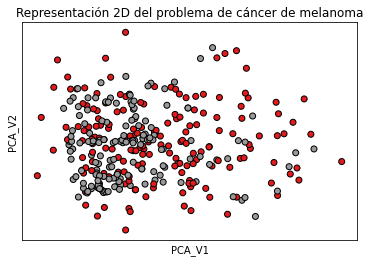

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#Transformamos el conjunto de datos inicial para que esté representado por solo 2 variables
n_componentes = 2
pca = PCA(n_components=n_componentes)
X_2D = pca.fit_transform(X)
  
#Se transforma el rango de cada variable a [0, 1]
st = StandardScaler()
X_2D = st.fit_transform(X_2D)

#Pintamos en un gráfico de puntos (scatterplot) el nuevo conjunto 2D
plt.scatter(X_2D[:, 0], X_2D[:, 1], cmap=plt.cm.Set1, c=pd.get_dummies(y).iloc[:,0], edgecolor='k')
plt.title("Representación 2D del problema de cáncer de melanoma")
plt.xlabel('PCA_V1')
plt.ylabel('PCA_V2')
plt.xticks(())
plt.yticks(())
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

y_int = pd.get_dummies(y).iloc[:,0]
X_2D_train, X_2D_test, y_2D_train, y_2D_test = train_test_split(X_2D, y_int, random_state=42)

print("Numero de instancias en entrenamiento: {}; y test: {}".format(len(X_train),len(X_test)))

Numero de instancias en entrenamiento: 252; y test: 84


## Regresion lineal vs logística

a)lineal

In [4]:
from sklearn import linear_model

lm = linear_model.LinearRegression()

#Aquí hacemos un pequeño "truco" que es transformar la salida categórica a valores {0,1}
#Este paso es necsario para aplicar el modelo de "regresión" que espera una salida de tipo real.
y_train_int = pd.get_dummies(y_train).iloc[:,0]

lm.fit(X_train, y_train_int)
print(lm.intercept_)
lm.coef_

0.3371977981689104


array([ 0.00062339, -0.01640629,  0.05765623, -0.00365438, -0.03219924,
        0.02831667,  0.02246995,  0.02406873,  0.04154468,  0.0113776 ,
        0.03335884,  0.02299525, -0.00375194,  0.04292671,  0.01228339,
       -0.01640771,  0.03062444, -0.00302422, -0.02929467,  0.00676286,
       -0.01947947, -0.02999738,  0.02491126, -0.0079843 , -0.00937148,
        0.00456585,  0.00615687, -0.01706812, -0.0042064 , -0.03262455,
       -0.03213231,  0.00450434, -0.05782194, -0.02456257,  0.0250594 ,
       -0.00637356,  0.04990764, -0.00675726, -0.04263797, -0.07777568,
        0.03133627,  0.01415696, -0.07683601, -0.08607171, -0.01192452,
        0.02302473,  0.06651956, -0.01050754,  0.04608665, -0.00776793])

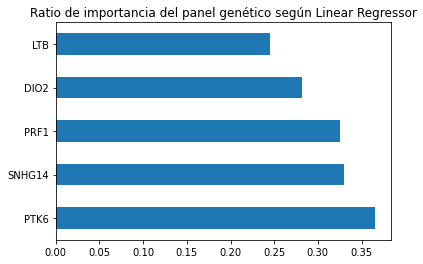

In [5]:
import numpy as np
from sklearn.preprocessing import normalize

importancia = np.abs(lm.coef_) #transformamos a una lista uni-dimensional
#Normalizamos los valores:
importancia_norm = normalize(importancia[:,np.newaxis], axis=0).ravel()

#Se representan las 5 más importantes según valor absoluto
(pd.Series(importancia_norm, index=X_train.columns).nlargest(5).plot(kind='barh'))
plt.title("Ratio de importancia del panel genético según Linear Regressor")
plt.show()

In [6]:
from sklearn.metrics import accuracy_score

#Volvemos a transformar la salida a un valor {0,1}
y_test_int = pd.get_dummies(y_test).iloc[:,0]
y_pred = lm.predict(X_test)

print("Valores de predicción originales (10 primeros):")
print(y_pred[:10])
print()

print("Valores de predicción redondeados (10 primeros):")

y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0

print(y_pred[:10])
print()

acc_score = accuracy_score(y_test_int, y_pred)
print("Accuracy obtenido:",acc_score)

Valores de predicción originales (10 primeros):
[ 1.29485689 -0.09064197  1.20110728  1.05823504  0.32454412  1.00993704
  0.65879706  0.6314562   0.2538342   0.45818503]

Valores de predicción redondeados (10 primeros):
[1. 0. 1. 1. 0. 1. 1. 1. 0. 0.]

Accuracy obtenido: 0.7142857142857143


b)logística

Coef. independiente: [2.60557275]
Coef. por variable: [[-0.03110064  0.16743501 -0.58385565 -0.041624    0.40949269 -0.3470138
  -0.25777581 -0.28951875 -0.41787594 -0.31815611 -0.42031786 -0.21280413
   0.12050644 -0.59472177 -0.05220371  0.14025638 -0.54429615 -0.0470958
   0.30750881 -0.07255672  0.28527669  0.24941566 -0.3904066   0.19336178
   0.12320901  0.10120174 -0.14906486  0.37664058 -0.02005865  0.37683877
   0.33847116 -0.16205854  0.73224376  0.15976062 -0.2941222   0.07575672
  -0.24837593  0.26439539  0.54176416  0.77176051 -0.20439398 -0.34556627
   0.5973885   0.96986976  0.09615201 -0.21446275 -0.93445767  0.03523568
  -0.31621746  0.25407509]]



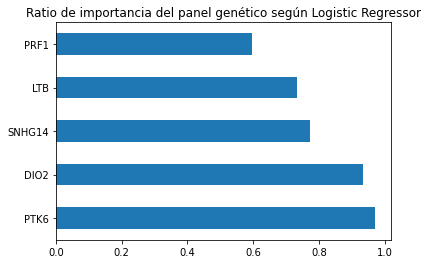


Valores de predicción originales (10 primeros):
['MITF-low' 'immune' 'MITF-low' 'MITF-low' 'immune' 'MITF-low' 'MITF-low'
 'MITF-low' 'immune' 'immune']

Acierto de Logistic Regression en la partición de test: 0.7380952380952381


In [7]:
import warnings
warnings.filterwarnings("ignore") 

lrm = linear_model.LogisticRegression()

lrm.fit(X_train, y_train.to_numpy().ravel())
print("Coef. independiente:",lrm.intercept_)
print("Coef. por variable:",lrm.coef_)
print()

importancia = np.abs(lrm.coef_[0]) #transformamos a una lista uni-dimensional
importancia_norm = normalize(importancia[:,np.newaxis], axis=0).ravel()
#Se representan las 5 más importantes según valor absoluto
(pd.Series(importancia, index=X_train.columns).nlargest(5).plot(kind='barh'))
plt.title("Ratio de importancia del panel genético según Logistic Regressor")
plt.show()
print()

y_pred = lrm.predict(X_test)

print("Valores de predicción originales (10 primeros):")
print(y_pred[:10])
print()

acc_score = accuracy_score(y_test, y_pred)
print("Acierto de Logistic Regression en la partición de test:", acc_score)


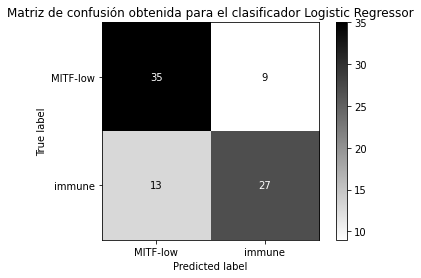

              precision    recall  f1-score   support

    MITF-low       0.73      0.80      0.76        44
      immune       0.75      0.68      0.71        40

    accuracy                           0.74        84
   macro avg       0.74      0.74      0.74        84
weighted avg       0.74      0.74      0.74        84

La medida F1 para el clasificador LogisticRegression es 0.7105
La medida AUC para el clasificador LogisticRegression es 0.7642


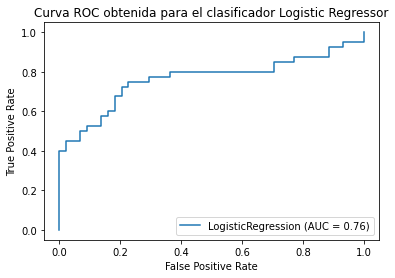

In [8]:
import matplotlib.pyplot as plt
from sklearn import metrics

metrics.plot_confusion_matrix(lrm, X_test, y_test,cmap='binary')
plt.title("Matriz de confusión obtenida para el clasificador Logistic Regressor")
plt.show()

print(metrics.classification_report(y_test,y_pred))

f1 = metrics.f1_score(y_test,y_pred,pos_label="immune")
print("La medida F1 para el clasificador %s es %.4f"%(lrm.__class__.__name__,f1))

y_probs = lrm.predict_proba(X_test)
auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print("La medida AUC para el clasificador %s es %.4f"%(lrm.__class__.__name__,auc))
metrics.plot_roc_curve(lrm, X_test, y_test)
plt.title("Curva ROC obtenida para el clasificador Logistic Regressor")
plt.show()

## knn

In [10]:
from sklearn.neighbors import KNeighborsClassifier # cargamos la función desde la biblioteca

#Ejemplo de uso de kNN
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean') # instanciamos el modelo
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
print("Acierto de KNN en la partición de test:", acc_score)

Acierto de KNN en la partición de test: 0.6785714285714286


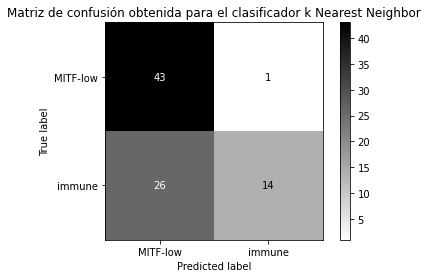

              precision    recall  f1-score   support

    MITF-low       0.62      0.98      0.76        44
      immune       0.93      0.35      0.51        40

    accuracy                           0.68        84
   macro avg       0.78      0.66      0.64        84
weighted avg       0.77      0.68      0.64        84

La medida F1 para el clasificador KNeighborsClassifier es 0.5091
La medida AUC para el clasificador KNeighborsClassifier es 0.7750


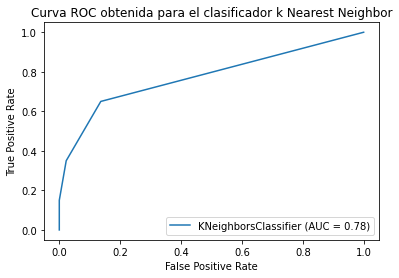

In [11]:
metrics.plot_confusion_matrix(knn, X_test, y_test,cmap='binary')
plt.title("Matriz de confusión obtenida para el clasificador k Nearest Neighbor")
plt.show()

print(metrics.classification_report(y_test,y_pred))

f1 = metrics.f1_score(y_test,y_pred,pos_label="immune")
print("La medida F1 para el clasificador %s es %.4f"%(knn.__class__.__name__,f1))

y_probs = knn.predict_proba(X_test)
auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print("La medida AUC para el clasificador %s es %.4f"%(knn.__class__.__name__,auc))
metrics.plot_roc_curve(knn, X_test, y_test)
plt.title("Curva ROC obtenida para el clasificador k Nearest Neighbor")
plt.show()

## Arbol de decisión

In [13]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
print("Acierto de DT en la partición de test:", acc_score)

Acierto de DT en la partición de test: 0.7023809523809523


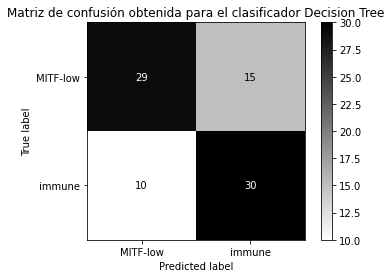

              precision    recall  f1-score   support

    MITF-low       0.74      0.66      0.70        44
      immune       0.67      0.75      0.71        40

    accuracy                           0.70        84
   macro avg       0.71      0.70      0.70        84
weighted avg       0.71      0.70      0.70        84

La medida F1 para el clasificador DecisionTreeClassifier es 0.7059
La medida AUC para el clasificador DecisionTreeClassifier es 0.7045


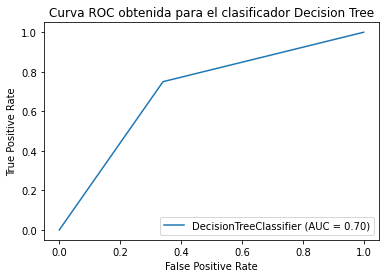

In [14]:
metrics.plot_confusion_matrix(dt, X_test, y_test,cmap='binary')
plt.title("Matriz de confusión obtenida para el clasificador Decision Tree")
plt.show()

print(metrics.classification_report(y_test,y_pred))

f1 = metrics.f1_score(y_test,y_pred,pos_label='immune')
print("La medida F1 para el clasificador %s es %.4f"%(dt.__class__.__name__,f1))

y_probs = dt.predict_proba(X_test)
auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print("La medida AUC para el clasificador %s es %.4f"%(dt.__class__.__name__,auc))
metrics.plot_roc_curve(dt, X_test, y_test)
plt.title("Curva ROC obtenida para el clasificador Decision Tree")
plt.show()